In [14]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve,
                            f1_score,
                            precision_score,
                            recall_score,
                            accuracy_score
                            )
warnings.filterwarnings('ignore')

In [4]:
seed = 42
np.random.seed(42)

### Loading Data

In [5]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### Model Training

In [6]:
model_lr = LogisticRegression(
                              random_state = 42,
                              max_iter= 1000
                            )

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Inference

In [ ]:

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [9]:
pd.Series(Y_test).value_counts()

0    1623
1     376
Name: count, dtype: int64

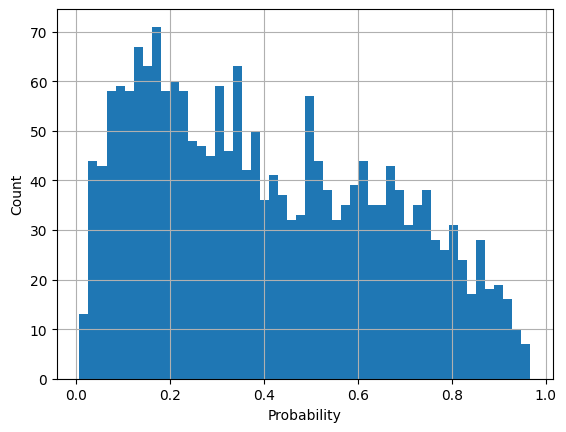

In [16]:
Y_lr_test = Y_proba_test[:, 1]

plt.hist(Y_lr_test, bins=50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Evaluation


In [24]:
Y_hat_test = Y_lr_test > 0.65
Y_hat_test

array([False, False, False, ..., False, False,  True], shape=(1999,))

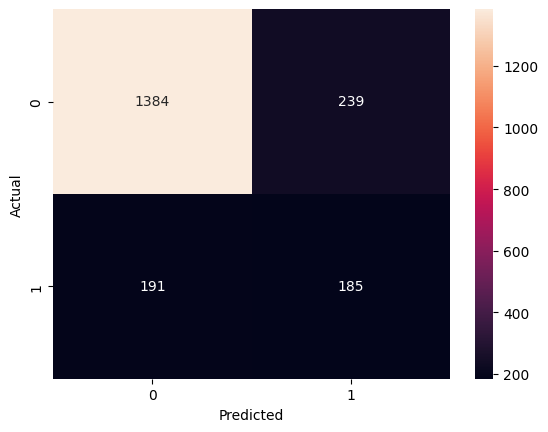

In [25]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap (cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()